# Load packages and use tensorflow as backend

In [8]:
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install requests
#import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import tensorflow as tf
import keras
from tensorflow.python.client import device_lib
import os
import seaborn as sns

import tensorflow as tf
from keras.layers import Input, Dense, Lambda, Layer, Activation
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras import metrics, optimizers
from keras import losses
from keras.callbacks import Callback
import keras
from keras import utils

import pydot
import graphviz
from keras.utils import plot_model
from keras_tqdm import TQDMNotebookCallback
#from .tqdm_callback import TQDMNotebookCallback
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [9]:
#test tensorflow, remember to change the kernel

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(32)
print("10 + 32 = ", sess.run(a + b))

b'Hello, TensorFlow!'
10 + 32 =  42


2022-07-28 12:30:02.284300: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 12:30:02.284514: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-28 12:30:02.289124: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-07-28 12:30:02.296112: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-28 12:30:02.330170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Check the system information

In [10]:
#######################################################################################################
#check the system information, check if cuda and gpu computing for tensorflow is installed properly
######################################################################################################
print("whether tensorflow is built with cuda: ", tf.test.is_built_with_cuda())
print("whether gpu computing is available for tensorflow: ", tf.test.is_gpu_available())
print("using keras version: ", keras.__version__)
print("using tensorflow version: ", tf.__version__)
print("\n")
print("Device details:\n", device_lib.list_local_devices())
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

whether tensorflow is built with cuda:  False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
whether gpu computing is available for tensorflow:  True
using keras version:  2.9.0
using tensorflow version:  2.9.2


Device details:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3704716250118109591
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 2164625456846212488
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
Default GPU Device: /device:GPU:0


2022-07-28 12:30:17.552506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 12:30:17.552653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-28 12:30:17.554870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 12:30:17.554937: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-28 12:30:17.556698: I tensor

# Reading files/documents

In [11]:
#Reading files/documents
#using all unlabeled data
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = '2021-05-05 02:22:24.668040/'
feature_path = path + pred_save_path + "nocompression_features_rotations.csv"
#only use labeled data
#path = "counts_data/counts_data_without_label/TCGA_SARC_(0.2chemo_45samples)VSTnrom_count_expr_clinical_data.tsv"

#open(path).readline()
#gene expression RNAseq, Batch effects normalized mRNA data

ExprAlldata = pd.read_csv(feature_path, sep = "\t", index_col = 0)
ExprAlldata = ExprAlldata.dropna(axis='columns')
#ExprAlldata.columns = ["Gene", "Counts"]
print("The dimension of input dataset is: ", ExprAlldata.shape)

The dimension of input dataset is:  (544, 50176)


In [12]:
ExprAlldata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
-01-CON-D00-L.png,20459.152,0.0,0.0,0.0,391696.03,205863.03,516136.44,0.0,0.00,238339.1,...,0.0,0.0,0.0,0.0,0.00,134881.44,0.0,0.0,0.00,59028.918
-01-CON-D02-L.png,393714.530,0.0,0.0,0.0,22553904.00,6472752.00,24896052.00,0.0,3545184.00,4688192.0,...,0.0,0.0,0.0,0.0,650361.44,1442400.40,0.0,0.0,340351.80,244538.940
-01-CON-D04-L.png,0.000,0.0,0.0,0.0,3908632.00,0.00,5609247.00,0.0,373565.97,97864.1,...,0.0,0.0,0.0,67994.0,755745.44,417971.34,0.0,0.0,273408.03,299599.470


## Sanity check

In [13]:
any_na = np.any(np.isnan(ExprAlldata))
print ('There exists NA value: ' + repr (any_na))

all_finite = np.all(np.isfinite(ExprAlldata))
print ('All values are finite: ' + repr (all_finite))

There exists NA value: False
All values are finite: True


# Data normalization choices

In [14]:
#minmax data transformation
from sklearn import preprocessing

#built up data frame
from pandas import DataFrame, Series
Exprframe = DataFrame(ExprAlldata)
#Exprframe = ExprAlldata.T
Exprframe_og = Exprframe

# Scale RNAseq data using zero-one normalization
Exprframe_zerone = preprocessing.MinMaxScaler().fit_transform(Exprframe)
Exprframe_zerone.shape

#change column name
#Exprframe.columns.values[0] = "Gene"

#set rownames
#Exprframe = Exprframe.set_index('Gene')
#Exprframe

(544, 50176)

In [15]:
# logistic transformation, logistic sigmoid function
#def logits(x):
#    return 1 / (1 + np.exp(-x))

#Exprframe_logit = logits(Exprframe)
#Exprframe_logit.shape

In [16]:
# Standardize
#scaler = preprocessing.StandardScaler()
#scaler.fit((Exprframe))
#Exprfram_std = scaler.transform(Exprframe)
#Exprfram_std.shape

In [17]:
# If select the minmax method
Exprframe = pd.DataFrame(Exprframe_zerone,
                         columns=Exprframe.columns,
                         index=Exprframe.index)

# If select the logistic transformation method
#Exprframe = pd.DataFrame(Exprframe_logit,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If select the Standardization method
#Exprframe = pd.DataFrame(Exprfram_std,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If use no transformation
#Exprframe = Exprframe_og

#print(Exprframe.shape)
#Exprframe.head(3)

#output log transformed data
#log_file = "counts_data/vae_compressed/log_transformed(0.2_var,3layers,0.1test,log).tsv"
#Exprframe.to_csv(log_file, sep='\t')

In [18]:
import math
#contruct training dataset
n_genes = Exprframe.shape[1]
print ('number of genes is ' + repr (n_genes))

number of genes is 50176


## Split 10% of the data as test set randomly

In [19]:
#import the data as training data
#set the random state to 42

# Split 10% test set randomly
test_set_percent = 0.1
Exprframe_test = Exprframe.sample(frac=test_set_percent, random_state = 42)
Exprframe_train = Exprframe.drop(Exprframe_test.index)
print("The dimension of training dataset is: ",Exprframe_train.shape)

The dimension of training dataset is:  (490, 50176)


# Load functions and classes
* This will facilitate connections between layers and also custom hyperparameters

In [20]:
# Function for reparameterization trick to make model differentiable
def sampling(args):
    
    import tensorflow as tf
    # Function with args required for Keras Lambda function
    z_mean, z_log_var = args

    # Draw epsilon of the same shape from a standard normal distribution
    epsilon = K.random_normal(shape=tf.shape(z_mean), mean=0.,
                              stddev=epsilon_std)
    
    # The latent vector is non-deterministic and differentiable
    # in respect to z_mean and z_log_var
    z = z_mean + K.exp(z_log_var / 2) * epsilon
    return z


class CustomVariationalLayer(Layer):
    """
    Define a custom layer that learns and performs the training
    This function is borrowed from:
    https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder.py
    """
    def __init__(self, **kwargs):
        # https://keras.io/layers/writing-your-own-keras-layers/
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    #def vae_loss(self, x_input, x_decoded):
    #    reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
    #    kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
    #                            K.exp(z_log_var_encoded), axis=-1)
    #    return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))
    
    def vae_loss(self, x_input, x_decoded):
        #per sample
        reconstruction_loss = original_dim * losses.mean_absolute_error(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        
        #
        #per data point
        #reconstruction_loss = losses.mean_absolute_error(x_input, x_decoded)
        #kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
        #                        K.exp(z_log_var_encoded), axis=-1) / latent_dim
        
        
        return K.mean(reconstruction_loss + alpha * (kl_loss))#K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))


    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

## Implementing Warm-up as described in Sonderby et al. LVAE

* This is modified code from https://github.com/fchollet/keras/issues/2595

In [21]:
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa
    # Behavior on each epoch
    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

## Set hyper parameters

In [22]:
# Set hyper parameters
original_dim = Exprframe.shape[1]
print("The dimension of input layer is: ", original_dim)

layer1_dim = 2000
latent_dim = 500

batch_size = 20 #Exprframe.shape[0]
epochs = 700
learning_rate = 0.002

#set kernel initializer
# Casey paper 'glorot_uniform'
#initial_method = 'glorot_uniform'
#initial_method = keras.initializers.glorot_uniform(seed=807)

initial_method = keras.initializers.glorot_normal(seed=42)

epsilon_std = 1.0
alpha = 1.0

beta = K.variable(0)
kappa = 0.002

The dimension of input layer is:  50176


# Encoder network

In [23]:
#simple neural network version with two layers
#Layer 1
# Input place holder for RNAseq data with specific input size
rnaseq_input = Input(shape=(original_dim, ))

#L1
l1_dense_linear = Dense(layer1_dim, kernel_initializer=initial_method)(rnaseq_input)
l1_dense_batchnorm = BatchNormalization()(l1_dense_linear)
l1 = Activation('relu')(l1_dense_batchnorm)

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
#Layer 6
# Input layer is compressed into a mean and log variance vector of size `latent_dim`
# Each layer is initialized with glorot uniform weights and each step (dense connections,
# batch norm, and relu activation) are funneled separately
# Each vector of length `latent_dim` are connected to the rnaseq input tensor

z_mean_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l1)
z_mean_dense_batchnorm = BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l1)
z_log_var_dense_batchnorm = BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = Activation('relu')(z_log_var_dense_batchnorm)

# return the encoded and randomly sampled z vector
# Takes two keras layers as input to the custom sampling function layer with a `latent_dim` output
z = Lambda(sampling, output_shape=(latent_dim, ))([z_mean_encoded, z_log_var_encoded])

# Decoder Network

In [25]:
# The decoding layers have 2 layers and relu activation
decoderl1_reconstruct = Dense(layer1_dim, kernel_initializer=initial_method, activation='relu')
decoder_l1 = decoderl1_reconstruct(z)

decoderl0_reconstruct = Dense(original_dim, kernel_initializer=initial_method, activation='relu')
rnaseq_reconstruct = decoderl0_reconstruct(decoder_l1)

## Connect the encoder and decoder to make the VAE

* The CustomVariationalLayer() includes the VAE loss function (reconstruction + (beta * KL)), which is what will drive our model to learn an interpretable representation of gene expression space.

* The VAE is compiled with an Adam optimizer and built-in custom loss function. The loss_weights parameter ensures beta is updated at each epoch end callback

In [26]:
from keras import losses
adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)
vae_layer = CustomVariationalLayer()([rnaseq_input, rnaseq_reconstruct])
vae = Model(rnaseq_input, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])
#vae.compile(optimizer=adam, loss=losses.kullback_leibler_divergence)

#########################################################################
#only use to manually set initial weights, otherwise change the initializer
weights = vae.get_weights()
#new_weight = [item*0+0.01 for item in weights]
#vae.set_weights(new_weight)
vae.summary()

/Users/aravind/Desktop/tensorflow-env/env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-07-28 12:33:32.912068: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 12:33:32.912111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-28 12:33:32.922888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-28 12:33:32.941510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50176)]      0           []                               
                                                                                                  
 dense (Dense)                  (None, 2000)         100354000   ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 2000)        8000        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2000)         0           ['batch_normalization[0][0]']

# Train the model

* The training data is shuffled after every epoch and 10% of the data is heldout for calculating validation loss.

In [34]:
%%time
hist = vae.fit(np.array(Exprframe_train),
               shuffle=True,
               epochs=epochs,
               verbose=0,
               batch_size=batch_size,
               validation_data=(np.array(Exprframe_test), None),
               callbacks=[WarmUpCallback(beta, kappa),
                          TQDMNotebookCallback(leave_inner=True, leave_outer=True)])

Training:   0%|          | 0/700 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/490 [00:00<?, ?it/s]

TypeError: 'float' object is not subscriptable

In [21]:
#hist.history
z5000_df = pd.DataFrame(hist.history)
z5000_df.loc[699]

loss        1629.669204
val_loss    1551.681360
Name: 699, dtype: float64

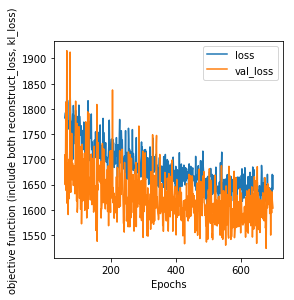

In [22]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
history_df = history_df.iloc[60:699]

hist_plot_file = "temp.pdf"#"(Lr_0.002)(NN6K_z100_a1.0_6L_0.1t)obj_func_per_dp(4cancers).pdf"#"temp.pdf"#
ax = history_df.plot()

ratio = 0.95
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
# the abs method is used to make sure that all numbers are positive
# because x and y axis of an axes maybe inversed.
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.set_xlabel('Epochs')
ax.set_ylabel('objective function (include both reconstruct_loss, kl_loss)')
ax.set_title('')
fig = ax.get_figure()
#fig.savefig(hist_plot_file)

# Extract Encoder model

In [23]:
#extract the encoder part

# Model to compress input
#encoder = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder = Model(rnaseq_input, z)
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50176)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2000)         100354000   input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2000)         8000        dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 2000)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [24]:
encoder2 = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50176)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2000)         100354000   input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2000)         8000        dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 2000)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [25]:
# Encode rnaseq into the hidden/latent representation - and save output
z_df = encoder.predict_on_batch(Exprframe_test)

z_df = pd.DataFrame(z_df, index=Exprframe_test.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

[z_mean_d, z_log_var_d]= encoder2.predict_on_batch(Exprframe_test)
z_mean_df = pd.DataFrame(z_mean_d, index=Exprframe_test.index)

z_mean_df.columns.name = 'sample_id'
z_mean_df.columns = z_mean_df.columns + 1


z_log_var_df = pd.DataFrame(z_log_var_d, index=Exprframe_test.index)

z_log_var_df.columns.name = 'sample_id'
z_log_var_df.columns = z_log_var_df.columns + 1

# Extract Decoder model

In [26]:
# build a generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim, ))  # can generate from any sampled z vector

_x_decoded_l1 = decoderl1_reconstruct(decoder_input)
_x_decoded_l0 = decoderl0_reconstruct(_x_decoded_l1)

decoder = Model(decoder_input, _x_decoded_l0)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_5 (Dense)              (None, 50176)             100402176 
Total params: 101,404,176
Trainable params: 101,404,176
Non-trainable params: 0
_________________________________________________________________


## Observe reconstruction fidelity

In [27]:
#original input RNAseq data
rnaseq_df = Exprframe_test
rnaseq_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
rotate90-04-CON-D09-R.png,0.684174,0.0,0.0,0.0,0.927903,0.305281,1.000000,0.0,0.060666,0.789363,...,0.0,0.0,0.0,0.0,0.611977,0.124129,0.0,0.0,0.629954,0.315790
rotate180-09-CON-D25-R.png,0.000000,0.0,0.0,0.0,0.045503,0.000000,0.050935,0.0,0.034668,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.019583,0.0,0.0,0.000000,0.015100
rotate270-06-CON-D25-L.png,0.000000,0.0,0.0,0.0,0.043805,0.091448,0.047249,0.0,0.000000,0.168737,...,0.0,0.0,0.0,0.0,0.000000,0.021884,0.0,0.0,0.000000,0.036162


In [28]:
# How well does the model reconstruct the input RNAseq data
input_rnaseq_reconstruct = decoder.predict(np.array(z_df))
input_rnaseq_reconstruct = pd.DataFrame(input_rnaseq_reconstruct, index=rnaseq_df.index,
                                        columns=rnaseq_df.columns)
input_rnaseq_reconstruct.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
rotate90-04-CON-D09-R.png,0.0,0.0,0.0,0.0,0.695071,0.024727,0.699118,0.0,0.0,0.148686,...,0.0,0.0,0.0,0.0,0.601766,0.115412,0.0,0.0,0.522355,0.259229
rotate180-09-CON-D25-R.png,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.009035,0.0,0.0,0.000000,0.038250
rotate270-06-CON-D25-L.png,0.0,0.0,0.0,0.0,0.049558,0.086069,0.076892,0.0,0.0,0.099687,...,0.0,0.0,0.0,0.0,0.000000,0.036089,0.0,0.0,0.000000,0.041678


In [29]:
#test the fidelity
reconstruction_fidelity = abs(rnaseq_df - input_rnaseq_reconstruct)

reconstruction_loss = reconstruction_fidelity.mean(axis = 1)

#print(reconstruction_loss)

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
#gene_summary.sort_values(by='gene abs(sum)', ascending=False).head(20)

# Print out the mean reconstruction loss and the mean KL loss

In [30]:
# L1 loss: losses.mean_absolute_error
reconstruction_loss_used = losses.mean_absolute_error(rnaseq_df, input_rnaseq_reconstruct) #* original_dim
with tf.Session() as sess:
    #print the reconstruction loss that we calculated
    mean_reconstruct_loss = sess.run(K.mean(reconstruction_loss_used))
    print ("The mean reconstruction loss for each data point is: %.11f" % mean_reconstruct_loss)

The mean reconstruction loss for each data point is: 0.02884974861


In [31]:
kl_loss = - 0.5 * K.sum(1 + z_log_var_d - K.square(z_mean_d) - 
                                K.exp(z_log_var_d), axis=-1) / latent_dim
with tf.Session() as sess:
    #print the kl loss that we calculated
    mean_kl_loss = sess.run(K.mean(kl_loss))
    print ("The mean KL loss for each data point is: %.11f" %mean_kl_loss)

The mean KL loss for each data point is: 0.21881414950


In [32]:
print ("The combined mean loss for each data point is: %.11f" % (mean_reconstruct_loss + alpha * mean_kl_loss))
print ("The current alpha choice for reconstruction loss + alpha*kl loss is: ", alpha)

The combined mean loss for each data point is: 0.24766389811
The current alpha choice for reconstruction loss + alpha*kl loss is:  1.0


In [33]:
# Encode rnaseq into the hidden/latent representation - and save output
#encoded_rnaseq_df

z_df = encoder.predict_on_batch(Exprframe)

z_df = pd.DataFrame(z_df, index=Exprframe.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

encoded_file = path + pred_save_path + "VAE_compressed_features_rotations.csv"
#encoded_file = "counts_data/vae_compressed/encoded_4_cancers_rnaseq_vae(perSp,a0,unlabel,0.2_var,3LF6k,z500,minmax).tsv"
z_df.to_csv(encoded_file, sep='\t')